<a href="https://colab.research.google.com/github/sauravkb94/Flawtrick/blob/main/Urbansound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!dir


drive  sample_data


In [8]:
filename='/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'


In [9]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

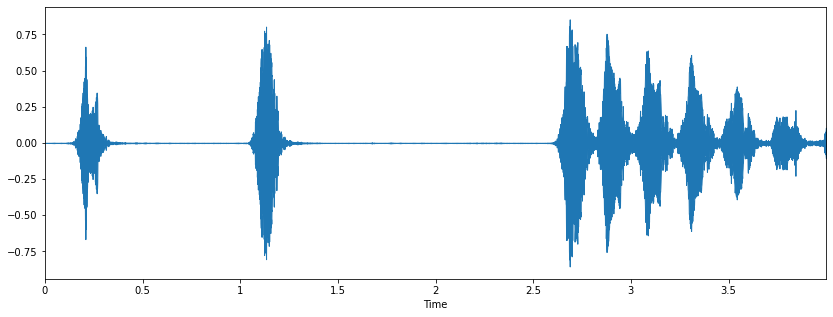

In [10]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [11]:
sample_rate

22050

In [12]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [13]:
wave_sample_rate

48000

In [14]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [15]:
data


array([-0.00011662, -0.00017163, -0.00017833, ..., -0.04541198,
       -0.04675572, -0.05040179], dtype=float32)

In [16]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [17]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [18]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [19]:
print(librosa_audio_data)

[-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179]


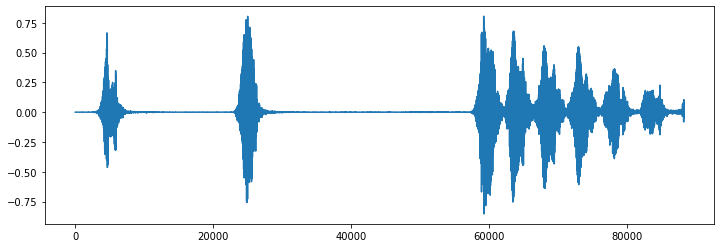

In [20]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [21]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [22]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

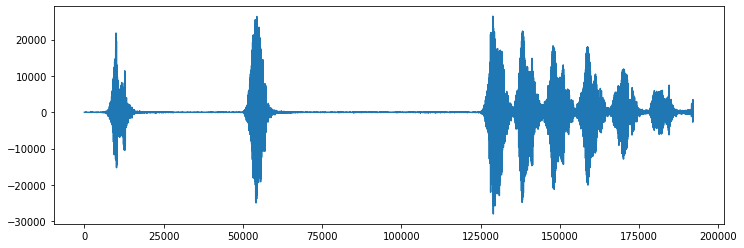

In [23]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [24]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [25]:
mfccs

array([[-5.21320618e+02, -5.19244873e+02, -5.18639771e+02, ...,
        -4.35682465e+02, -3.92686127e+02, -3.53734650e+02],
       [ 1.43376465e+01,  1.71779118e+01,  1.81039009e+01, ...,
         1.13759216e+02,  1.51305222e+02,  1.78508270e+02],
       [ 1.35261917e+01,  1.61207390e+01,  1.72592888e+01, ...,
         6.42746277e+01,  6.28374176e+01,  5.72559586e+01],
       ...,
       [ 3.53906393e-01, -3.32358456e+00, -4.83565140e+00, ...,
        -5.26991272e+00, -1.14964163e+00, -2.76052785e+00],
       [ 4.51929927e-01, -3.06704044e+00, -4.64729738e+00, ...,
        -3.42241073e+00,  2.55063629e+00,  2.86859894e+00],
       [ 4.35776591e-01, -2.79775834e+00, -4.41259766e+00, ...,
        -2.67133570e+00,  1.37135601e+00, -4.06251371e-01]], dtype=float32)

In [26]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [28]:
import numpy as np
from tqdm import tqdm

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

In [29]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [20:17,  2.93it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [46:45,  3.09it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [46:46,  3.60it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [48:56,  2.97it/s]


In [30]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [31]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
X.shape

(8732, 40)

In [33]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [34]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train



array([[-1.3082390e+02,  1.1256225e+02, -2.2600878e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386472e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661475e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532947e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775635e+00, -1.5828822e+00,  3.5109408e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330575e-01,  7.1890563e-01,  7.1397936e-01],
       [-1.4541722e+02,  1.3619025e+02, -3.3450352e+01, ...,
         1.4591718e+00, -1.9928970e+00, -8.9318532e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814040e+00, ...,
        -5.4054899e+00, -3.3959770e+00, -1.5590971e+00]], dtype=float32)

In [36]:
X_train.shape

(6985, 40)

In [37]:
X_test.shape

(1747, 40)

In [38]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_train.shape

(6985, 10)

In [40]:
y_test.shape

(1747, 10)

In [41]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
### No of classes
num_labels=y.shape[1]

In [44]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [46]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [47]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/UrbanSound8K/Train.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
207/219 [===========================>..] - ETA: 0s - loss: 11.3164 - accuracy: 0.1141
Epoch 1: val_loss improved from inf to 2.29424, saving model to /content/drive/MyDrive/UrbanSound8K/Train.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 10.8863 - accuracy: 0.1138 - val_loss: 2.2942 - val_accuracy: 0.1082
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 2.5416 - accuracy: 0.1164
Epoch 2: val_loss improved from 2.29424 to 2.28260, saving model to /content/drive/MyDrive/UrbanSound8K/Train.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5424 - accuracy: 0.1165 - val_loss: 2.2826 - val_accuracy: 0.1082
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3487 - accuracy: 0.1145
Epoch 3: val_loss improved from 2.28260 to 2.26728, saving model to /content/drive/MyDrive/UrbanSound8K/Train.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3472 - accuracy: 0.1141 - val_loss: 2.2

In [48]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7658843994140625


In [49]:
X_test[1]


array([-465.89066  ,    1.1322277,  -34.01122  ,   35.365326 ,
        -14.865486 ,  -19.09527  ,   -0.5655366,  -16.102211 ,
        -21.32794  ,    7.7042246,  -29.161444 ,  -18.939268 ,
         -2.9505708,   -8.135997 ,  -15.148013 ,   -6.580668 ,
         -7.555405 ,    9.359482 ,   14.432987 ,   21.94775  ,
         20.870613 ,    1.3638182,  -19.213827 ,   -4.613979 ,
         -1.0521431,    3.2284064,   -6.983857 ,  -16.403254 ,
        -10.018602 ,   13.024475 ,    0.5268236,  -23.8531   ,
        -15.273722 ,    9.262865 ,   10.387703 ,   -0.562457 ,
         -1.2470247,   17.716091 ,   13.853949 ,   -5.1873612],
      dtype=float32)

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score

In [51]:
rf = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

In [52]:
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Accuracy of Random Forest: 64.10990269032627 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       195
           1       1.00      0.49      0.66        91
           2       0.96      0.39      0.55       205
           3       0.96      0.55      0.70       182
           4       0.97      0.74      0.84       202
           5       1.00      0.84      0.91       216
           6       1.00      0.61      0.76        87
           7       0.95      0.83      0.88       187
           8       0.99      0.73      0.84       199
           9       0.90      0.28      0.43       183

   micro avg       0.98      0.64      0.77      1747
   macro avg       0.97      0.63      0.75      1747
weighted avg       0.97      0.64      0.76      1747
 samples avg       0.64      0.64      0.64      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [54]:
knn_acc_score = accuracy_score(y_test, y_pred_knn)

In [55]:
print("\n")
print("Accuracy of K Neighbors :",knn_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Accuracy of K Neighbors : 81.45392100744134 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       195
           1       1.00      0.49      0.66        91
           2       0.96      0.39      0.55       205
           3       0.96      0.55      0.70       182
           4       0.97      0.74      0.84       202
           5       1.00      0.84      0.91       216
           6       1.00      0.61      0.76        87
           7       0.95      0.83      0.88       187
           8       0.99      0.73      0.84       199
           9       0.90      0.28      0.43       183

   micro avg       0.98      0.64      0.77      1747
   macro avg       0.97      0.63      0.75      1747
weighted avg       0.97      0.64      0.76      1747
 samples avg       0.64      0.64      0.64      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [57]:
dtc_acc_score = accuracy_score(y_test, y_pred_dtc)

In [58]:
print("\n")
print("Accuracy of Decision Tree :",dtc_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Accuracy of Decision Tree : 70.6926159129937 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       195
           1       1.00      0.49      0.66        91
           2       0.96      0.39      0.55       205
           3       0.96      0.55      0.70       182
           4       0.97      0.74      0.84       202
           5       1.00      0.84      0.91       216
           6       1.00      0.61      0.76        87
           7       0.95      0.83      0.88       187
           8       0.99      0.73      0.84       199
           9       0.90      0.28      0.43       183

   micro avg       0.98      0.64      0.77      1747
   macro avg       0.97      0.63      0.75      1747
weighted avg       0.97      0.64      0.76      1747
 samples avg       0.64      0.64      0.64      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
model_ev = pd.DataFrame({'Model': ['K Neighbors Classifier','Decision Tree Classifier','Random Forest Classfier'],'Accuracy': [knn_acc_score*100,dtc_acc_score*100,rf_acc_score*100]})
model_ev

,Model,Accuracy
0,K Neighbors Classifier,81.453921
1,Decision Tree Classifier,70.692616
2,Random Forest Classfier,64.109903


# Commented out IPython magic to ensure Python compatibility.


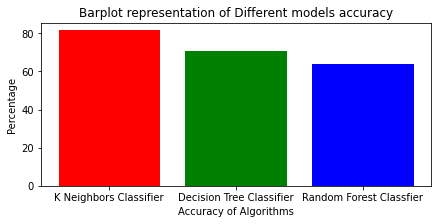

In [60]:
from matplotlib import pyplot as plt
# %matplotlib inline
colors = ['red','green','blue']
plt.figure(figsize=(7,3))
plt.title("Barplot representation of Different models accuracy")
plt.xlabel("Accuracy of Algorithms")
plt.ylabel("Percentage")
plt.bar(model_ev['Model'], model_ev['Accuracy'],color = colors)
plt.show()

In [61]:
num_labels= y.shape[1]

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizer_v1 import Adam
from keras.callbacks import TensorBoard

In [63]:
cnn = Sequential()
cnn.add(Conv1D(32, 2, activation='relu', input_shape=(40,1)))
cnn.add(Dropout(0.5))

In [64]:
cnn.add(Conv1D(64, 2, activation='relu', input_shape= (40,1)))
cnn.add(Dropout(0.5))

In [65]:
cnn.add(Conv1D(128, 2, activation='relu', input_shape= (40,1)))
cnn.add(Dropout(0.5))

In [66]:
cnn.add(Flatten())
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))

In [67]:
cnn.add(Dense(num_labels, activation='sigmoid'))

In [68]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 32)            96        
                                                                 
 dropout_3 (Dropout)         (None, 39, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 64)            4160      
                                                                 
 dropout_4 (Dropout)         (None, 38, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 128)           16512     
                                                                 
 dropout_5 (Dropout)         (None, 37, 128)           0         
                                                                 
 flatten (Flatten)           (None, 4736)             

In [69]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [70]:
epochs = 100
batch_size = 32
history = cnn.fit(X_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_data=(X_test, y_test) )

Epoch 1/100
219/219 [==============================] - 6s 21ms/step - loss: 2.6415 - accuracy: 0.1307 - val_loss: 2.2877 - val_accuracy: 0.1070
Epoch 2/100
219/219 [==============================] - 4s 20ms/step - loss: 2.2703 - accuracy: 0.1435 - val_loss: 2.2701 - val_accuracy: 0.1122
Epoch 3/100
219/219 [==============================] - 4s 20ms/step - loss: 2.2359 - accuracy: 0.1629 - val_loss: 2.2075 - val_accuracy: 0.2032
Epoch 4/100
219/219 [==============================] - 5s 21ms/step - loss: 2.1777 - accuracy: 0.1960 - val_loss: 2.1556 - val_accuracy: 0.2227
Epoch 5/100
219/219 [==============================] - 5s 21ms/step - loss: 2.1244 - accuracy: 0.2133 - val_loss: 2.0409 - val_accuracy: 0.2679
Epoch 6/100
219/219 [==============================] - 5s 22ms/step - loss: 2.0646 - accuracy: 0.2457 - val_loss: 1.9075 - val_accuracy: 0.3623
Epoch 7/100
219/219 [==============================] - 4s 20ms/step - loss: 1.9965 - accuracy: 0.2730 - val_loss: 1.8231 - val_accuracy:

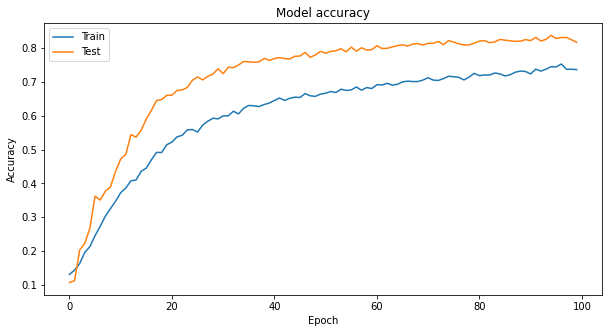

In [71]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("acc.png")
plt.show()

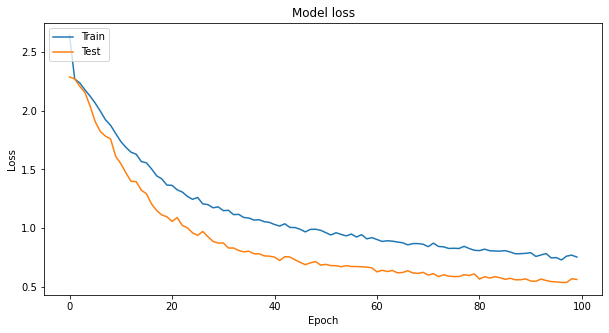

In [72]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss.png")
plt.show()

In [73]:
test_accuracy = cnn.evaluate(X_test, y_test, verbose = 1)
print(test_accuracy[1]*100)

55/55 [==============================] - 0s 4ms/step - loss: 0.5637 - accuracy: 0.8174
81.74012303352356


In [74]:
!cd fold1

/bin/bash: line 0: cd: fold1: No such file or directory


In [75]:
!ls

acc.png  drive	loss.png  sample_data


In [76]:
filename="/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [77]:
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
#predicted_label=model.predict_classes(mfccs_scaled_features)
y_pred = cnn.predict(mfccs_scaled_features)
predicted_label = np.round(y_pred).astype(int)
print(predicted_label)

[-4.03732391e+02  9.40706024e+01  1.80648632e+01 -1.18128529e+01
 -7.22851610e+00  3.84677982e+00 -1.61263695e+01 -6.87371588e+00
 -1.05110025e+01 -5.15516376e+00  6.54059649e-02 -4.93339109e+00
  9.76592660e-01  1.30401611e+00  4.17705745e-01  6.07535696e+00
  2.96011591e+00  3.40491509e+00 -4.25494432e+00 -3.73522449e+00
 -1.90352023e+00 -3.09303164e+00 -3.51438236e+00 -5.68409061e+00
 -1.79311764e+00 -2.41673779e+00 -2.81908274e+00  4.31168415e-02
 -6.28012598e-01 -1.24718994e-01 -8.68049681e-01 -1.01920950e+00
 -2.65345836e+00 -5.41679144e-01 -1.97094429e+00 -2.98468328e+00
 -3.09625268e+00 -1.50933349e+00 -2.44360065e+00 -2.87052202e+00]
[[-4.03732391e+02  9.40706024e+01  1.80648632e+01 -1.18128529e+01
  -7.22851610e+00  3.84677982e+00 -1.61263695e+01 -6.87371588e+00
  -1.05110025e+01 -5.15516376e+00  6.54059649e-02 -4.93339109e+00
   9.76592660e-01  1.30401611e+00  4.17705745e-01  6.07535696e+00
   2.96011591e+00  3.40491509e+00 -4.25494432e+00 -3.73522449e+00
  -1.90352023e+00 -

In [78]:
if(predicted_label[0][0] == 1):
	print("Air Conditioner")
elif(predicted_label[0][1] == 1):
	print("Car Horn")
elif(predicted_label[0][2] == 1):
	print("Children Playing")
elif(predicted_label[0][3] == 1):
	print("Dog Bark")	
elif(predicted_label[0][4] == 1):
	print("Drilling")	
elif(predicted_label[0][5] == 1):
	print("engine_idling")	
elif(predicted_label[0][6] == 1):
	print("Gun Shot")	
elif(predicted_label[0][7] == 1):
	print("Jack Hammer")
elif(predicted_label[0][8] == 1):
	print("Siren")
elif(predicted_label[0][9] == 1):
	print("Street Music")

Children Playing


In [79]:
# Importing 1 file
y, sr = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179] 

y shape: (88200,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 4.0


In [80]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179] 

Audio File shape: (88200,)


# Importing the 5 files

In [82]:
#STREETMUSIC
STREETMUSIC= ('/content/drive/MyDrive/UrbanSound8K/Street Music.wav')
y_STREETMUSIC, sr_STREETMUSIC = librosa.load(STREETMUSIC)
audio_STREETMUSIC, _ = librosa.effects.trim(y_STREETMUSIC)

In [83]:
#DOGBARK
DOGBARK= ('/content/drive/MyDrive/UrbanSound8K/dog_bark.wav')
y_DOGBARK, sr_DOGBARK = librosa.load(DOGBARK)
audio_DOGBARK, _ = librosa.effects.trim(y_DOGBARK)

In [84]:
#DRILLING
DRILLING= ('/content/drive/MyDrive/UrbanSound8K/Drilling.wav')
y_DRILLING, sr_DRILLING = librosa.load(DRILLING)
audio_DRILLING, _ = librosa.effects.trim(y_DRILLING)

In [85]:
#CARHORN
CARHORN= ('/content/drive/MyDrive/UrbanSound8K/car_horn.wav')
y_CARHORN, sr_CARHORN = librosa.load(CARHORN)
audio_CARHORN, _ = librosa.effects.trim(y_CARHORN)

#REPRESENTATION OF 2D SIGNAL